### Генерация данных

In [2]:
import numpy as np

In [6]:
np.random.seed(1)

statistical_population = np.random.choice([0, 1], size=50, p=[.98, .02])
statistical_population

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

## Точечная оценка доли

In [7]:
statistical_population.mean()

0.02

## Доверительный интервал для доли

In [8]:
from statsmodels.stats.proportion import proportion_confint

In [10]:
normal_interval = proportion_confint(sum(statistical_population), len(statistical_population),
                                     method = 'normal')
normal_interval

(-0.018805307081790987, 0.058805307081790992)

### Доверительный интервал Уилсона

In [11]:
wilson_interval = proportion_confint(sum(statistical_population), len(statistical_population),
                                     method = 'wilson')
wilson_interval

(0.0035392592716462362, 0.10495443589637815)

## Размер выборки для интервала заданной ширины

In [12]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [13]:
n_samples = int(np.ceil(samplesize_confint_proportion(statistical_population.mean(), 0.01)))
n_samples

753

# Зависимость объема выборки от вероятности

In [19]:
p = np.arange(0, 1, 0.01)

In [18]:
n = [int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in p]

In [25]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


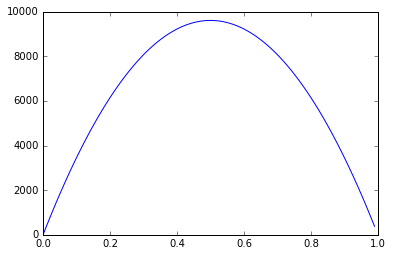

In [26]:
plt.plot(p,n)

Посчитаем вероятность при которой нужно больше всего испытуемых

In [36]:
p_max = p[n.index(max(n))]
p_max

0.5

Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%  и вероятностью p_max?

In [37]:
n_samples_bad = int(np.ceil(samplesize_confint_proportion(p_max, 0.01)))
n_samples_bad

9604